# More priors: mixtures of conjugate priors

#### Josep Fortiana 2018-11-07

## Persi Diaconis

![Alt text](Persi.Diaconis.jpg)

Stanford stat and math professor Persi Diaconis, formerly a professional magician, famously determined how many times a deck of cards  must be shuffled in order to give a mathematically random result (seven). He’s also dabbled in coin games. 

You might be interested in his 2013 video talk: [The Search for Randomness](https://www.youtube.com/watch?v=xit5LDwJVck)

The example below is taken from the paper by Persi Diaconis and Donald Ylvisaker (1985), _Quantifying prior opinion._
In: J.M. Bernardo et al (eds), _Bayesian Statistics 2,_ Elsevier Science Publishers B.V. (North-Holland) pp. 133-156.
A modified form of it appears in  Jim Albert (2009), Bayesian computation with R (2nd ed), Springer, pp. 49-52 (se Exercise below).

## The spinning coin

The problem investigated originates from the following fact: if a coin is spinned on its edge instead of being flipped, the proportion of heads or tails is not around 50% but rather such values as one third or two thirds are obtained.
    
![Alt text](spinning.coin.2.jpg)

According to Diaconis, "the reasons for the bias are not hard to infer. The shape of the edge will be a strong determining factor - indeed, magicians have coins that are slightly shaved; the eye cannot detect the shaving, but the spun coin always comes up heads".

For $n$ tosses of a spinning coin, the number $x$ of heads up is a $\operatorname{B}(n,\theta)$, and $\theta$'s prior pdf will typically be a bimodal function (i.e., presenting two local maxima). Hence it cannot be modelled with a $\operatorname{Beta}(\alpha,\beta)$, which has a single mode at:

$$
	\dfrac{\alpha-1}{\alpha+\beta-2}
$$

### A possible prior: a mixture of two Beta pdf's

A mixture pdf, a convex combination of two Betas,

$$
    \gamma\,\operatorname{Beta}(10,20)+(1-\gamma)\,\operatorname{Beta}(20,10).
$$

has two modes. The mixture prior can be thought of as a weighted combination of two _beta populations,_ the weights $\gamma$ and $(1-\gamma)$ measuring the prior degree of belief that the actual coin was chosen from each population. 

[1] 0.321

[1] 0.679

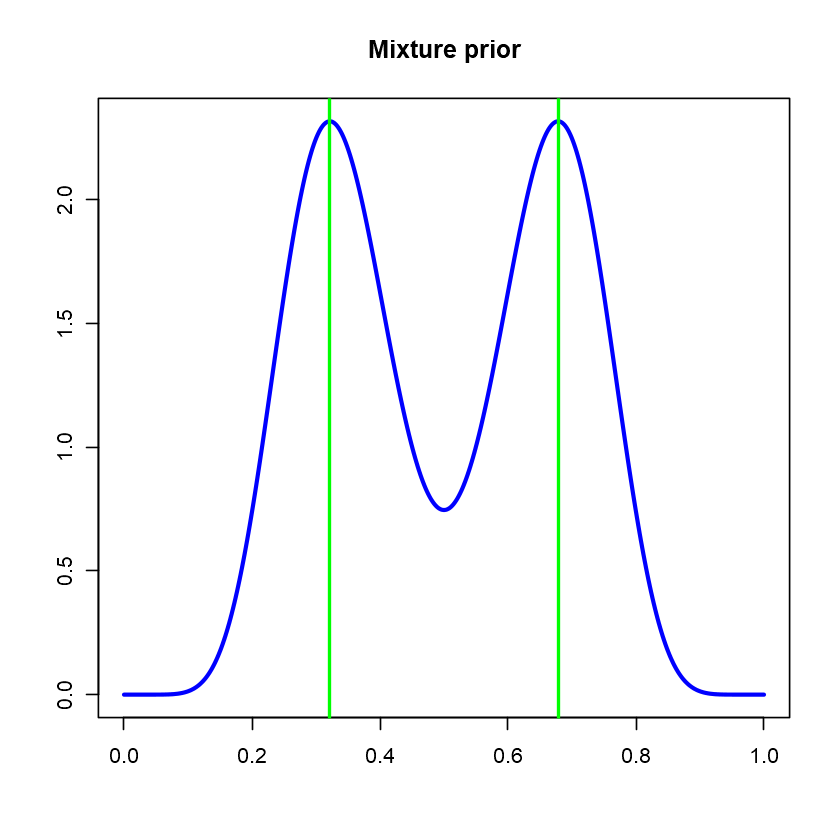

In [1]:
prior.alpha1<-10
prior.beta1<-20
prior.alpha2<-20
prior.beta2<-10
prior.gamma<-0.5
mixture.prior.pdf<-function(theta){
    return(prior.gamma*dbeta(theta,prior.alpha1,prior.beta1)+(1-prior.gamma)*dbeta(theta,prior.alpha2,prior.beta2))
    }
#
# Plotting the mixture prior
#
u<-seq(0,1,length=500)
plot(u,mixture.prior.pdf(u),"l",lwd=2.5,col="blue",xlab="",ylab="",main="Mixture prior")
prior.m1<-(prior.alpha1-1)/(prior.alpha1+prior.beta1-2)
prior.m2<-(prior.alpha2-1)/(prior.alpha2+prior.beta2-2)
abline(v=prior.m1,lwd=2.0,col="green")
abline(v=prior.m2,lwd=2.0,col="green")
round(prior.m1,3)
round(prior.m2,3)

## Simulation of a mixture pdf

In general, to generate a sequence of random numbers from a mixture of two pdf's:
	
$$
	\gamma\cdot h_{1}+(1-\gamma)\cdot h_{2}, \quad \gamma\in(0,1),
$$

we generate a sequence of realizations of a binary r.v. $I\sim\operatorname{Bernoulli}(\gamma)$ and:
	
- For each entry $I=1$, generate a realization of $h_{1}$, 
	
- For each entry $I=0$, gnerate a realization of $h_{2}$.

Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.4.3"

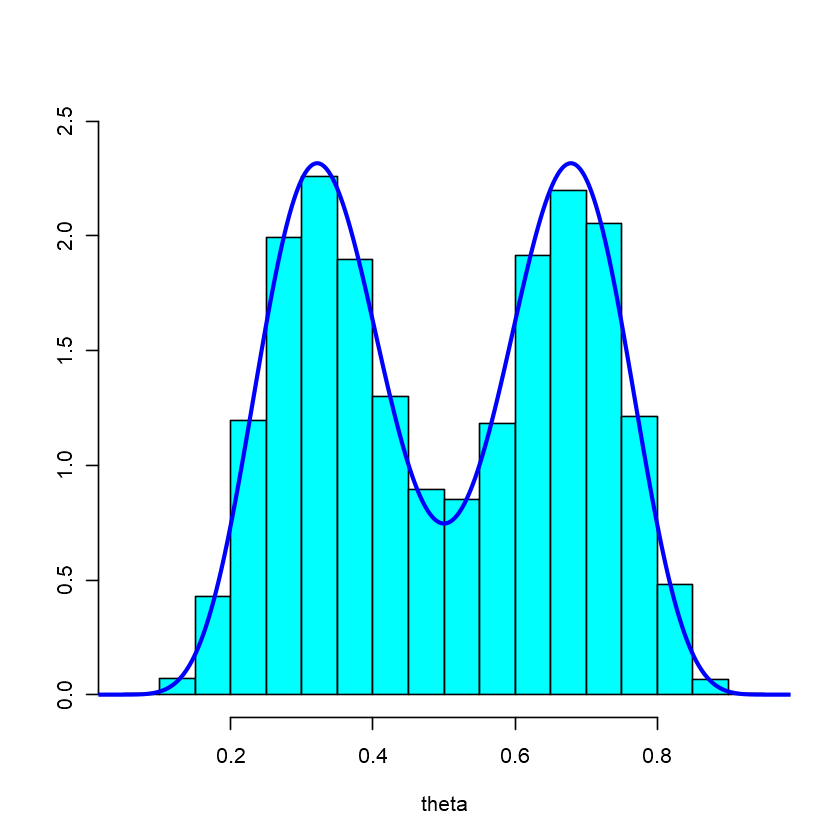

In [2]:
#
# Generating random numbers following the mixture prior
#
require(MASS)
N<-10000
Ind<-rbinom(N,size=1,prob=prior.gamma)
theta<-Ind*rbeta(N,shape1=prior.alpha1,shape2=prior.beta1)+(1-Ind)*rbeta(N,shape1=prior.alpha2,shape2=prior.beta2)
truehist(theta,ylim=c(0,2.5))
lines(u,mixture.prior.pdf(u),lwd=2.5,col="blue",xlab="",ylab="",main="Mixture prior")

#### Exercise

Generate random numbers following the mixture:

$$
    0.25\,\operatorname{N}(-4,1)+0.50\,\operatorname{N}(0,1)+0.25\,\operatorname{N}(4,1)
$$

Verify, as above, that the histogram is close to the pdf.

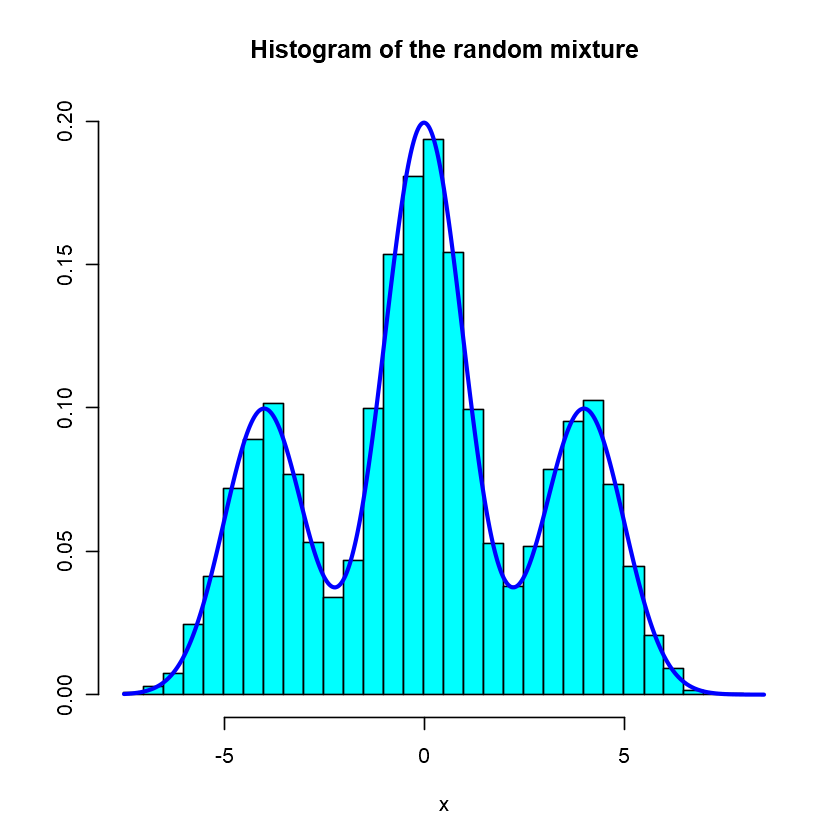

In [3]:
#
# Insert your code here
#
require(MASS)
N<-10000
gamma<-c(0.25,2.5,2.25)
mu1<--4
mu2<-

mu<-c(mu1, mu2, mu3)
Ind<-rmultinom(N,size=1,prob=gamma) # Bernoulli
A<-rbind(rnorm(N, mean=mu1, sd=sigma), rnorm(N, mean=mu2, sd=sigma), rnorm())
x<-apply(Ind*A,2,sum)
truehist(theta,ylim=c(0,0.2))
x.min<-round(min(x)*2)/2
x.max<-round(max(x)*2)/2
u<-seq(x.min, x.max, length=600)
pdf<-function(t){gamma%*%rbind()}
lines(u,mixture.prior.pdf(u),lwd=2.5,col="blue",xlab="",ylab="",main="Mixture prior")

### Bayesian modelling with a mixture of conjugates prior

Assume the prior pdf for $\theta$ is:

$$
	h(\theta)=\gamma\cdot h_{1}(\theta)+(1-\gamma)\cdot h_{2}(\theta),
$$

and the likelihood is: $f(x\,|\,\theta)$. We assume that both $h_{1}(\theta)$ and $h_{2}(\theta)$ belong to the conjugate family to the likelihood.

Then, the joint pdf is:

$$
	f(x,\theta)=\gamma\cdot f_{1}(x,\theta)+(1-\gamma)\cdot  f_{2}(x,\theta).
$$

where:

$$
	 f_{i}(x,\theta)=f(x\,|\,\theta)\cdot h_{i}(\theta),\quad i=1,2.
$$


#### Prior predictive pdf from a mixture prior
	
Integrating out $\theta$, the marginal for $x$:

$$
	f(x)=\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x),
$$	

where:

$$
	f_{i}(x)=\int f(x\,|\,\theta)\cdot h_{i}(\theta)\,d\theta, \quad i=1,2.
$$

Thus, the prior predictive pdf is a mixture, a convex combination of two pdf's, _partial prior predictive pdf's,_ with the same coefficients, $\gamma$ and $1-\gamma$, as the prior. By virtue of the conjugacy property we assumed these partial prior predictive pdf's follow from the general formulas of the conjugate pair, so there is no need to explicitly integrate $\theta$ out. 

#### Posterior pdf from a mixture prior

From Bayes' formula:

$$
	h(\theta\,|\,x)=\dfrac{f(x,\theta)}{f(x)}
		=\dfrac{\gamma\cdot f_{1}(x,\theta)+(1-\gamma)\cdot  f_{2}(x,\theta)}
			{\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}.
$$	

We will use the obvious notation:

$$
	h_{i}(\theta\,|\,x)=\dfrac{f_{i}(x,\theta)}{f_{i}(x)}	\quad i=1,2.
$$

These functions are called _partial posterior pdf's._ Again, the conjugacy property allows us to derive them from the general formulas of the conjugate pair, that is, they belong to the same family as the priors with updated parameters.
The posterior pdf is:

$$
	h(\theta\,|\,x)=\widehat{\gamma}(x)\cdot h_{1}(\theta\,|\,x)
		+(1-\widehat{\gamma}(x))\cdot h_{2}(\theta\,|\,x),
$$

where the _posterior mixture weights_ are:

$$
	\widehat{\gamma}(x)=\dfrac{\gamma\cdot f_{1}(x)}{\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}
$$

and $1-\widehat{\gamma}(x)$. Now, these weight are not the same as those in the prior and, furthermore, they depend on the observed data.

#### Partial prior predictive pdf's

\begin{align*}
	f_{1}\sim\operatorname{Beta-Binom}(n,\alpha_{1},\beta_{1})&=\operatorname{Beta-Binom}(10,10,20),\\
	f_{2}\sim\operatorname{Beta-Binom}(n,\alpha_{2},\beta_{2})&=\operatorname{Beta-Binom}(10,20,10),
\end{align*}

In [4]:
require(extraDistr) # needed for the Beta-binomial predictive prior
f1<-function(x){dbbinom(x,size=n,alpha=prior.alpha1,beta=prior.beta1)}
f2<-function(x){dbbinom(x,size=n,alpha=prior.alpha2,beta=prior.beta2)}

Loading required package: extraDistr
Warning message:
"package 'extraDistr' was built under R version 3.4.3"

### For the Diaconis spinning coin experiment

He reports $x=3$ heads out of $n=10$ spins.

In [5]:
n<-10
x<-3

We check whether the observed data are consistent with the proposed prior. If observed data were very improbable assuming the predictive prior derived from a given prior we should try to replace it with another one, with better concordance.

In [6]:
# for the observed x
f1x<-f1(x)
f2x<-f2(x)
round(f1x,4)
#[1] 0.2276
round(f2x,4)
#[1] 0.0277

[1] 0.2276

[1] 0.0277

For the observed $x=3$, give:

$$
	f_{1}(x)=0.2276,\mskip 80mu f_{2}(x)=0.0277.
$$

#### Posterior weights

In [7]:
posterior.gamma<-prior.gamma*f1x/(prior.gamma*f1x+(1-prior.gamma)*f2x)
round(posterior.gamma,4)
#[1] 0.8915

[1] 0.8915

$$
    \widehat{\gamma}(x)=\dfrac{\gamma\cdot f_{1}(x)}{\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}= 0.8915.
$$

#### Partial posterior pdf's

$$
\begin{array}{l}
	h_{1}\sim\operatorname{Beta}(\alpha_{1}+x,\beta_{1}+n-x)=\operatorname{Beta}(10+3,20+10-3)
        =\operatorname{Beta}(13,27),\\[0.3cm]
	h_{2}\sim\operatorname{Beta}(\alpha_{2}+x,\beta_{2}+n-x)=\operatorname{Beta}(20+3,10+10-3)
        =\operatorname{Beta}(23,17).
\end{array}
$$

In [8]:
posterior.alpha1<-prior.alpha1+x
posterior.beta1<-prior.beta1+n-x
posterior.alpha2<-prior.alpha2+x
posterior.beta2<-prior.beta2+n-x

#### Posterior pdf

In [9]:
mixture.posterior.pdf<-function(theta){
    return(posterior.gamma*dbeta(theta,posterior.alpha1,posterior.beta1)
    +(1-posterior.gamma)*dbeta(theta,posterior.alpha2,posterior.beta2))}

$$
    0.8915\,\operatorname{Beta}(13,27)+0.1085\,\operatorname{Beta}(23,17).
$$

[1] 0.3158

[1] 0.5789

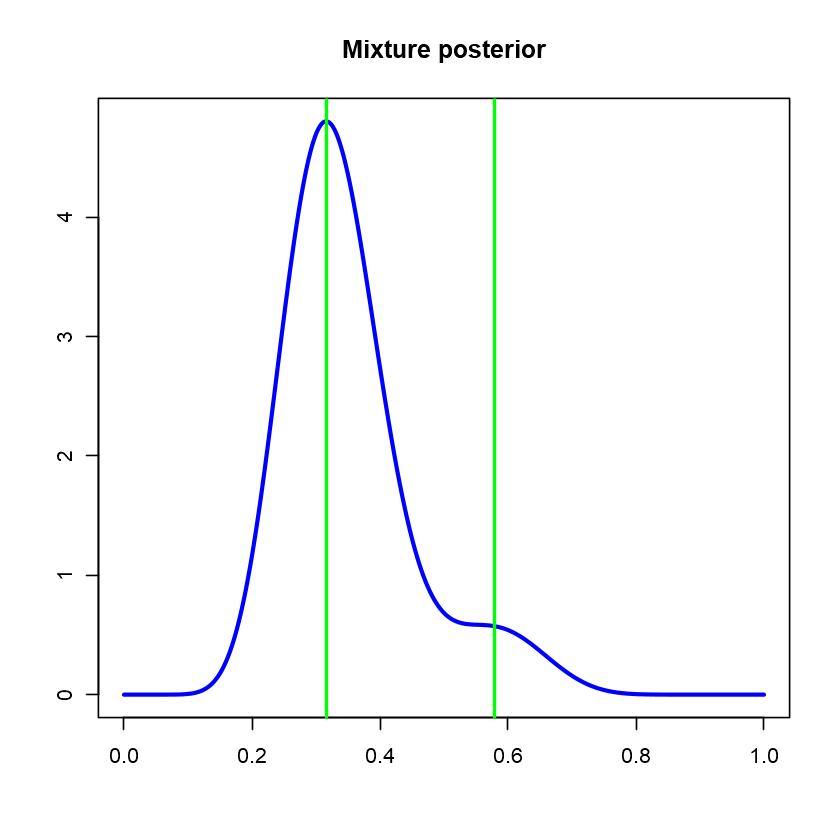

In [10]:
# Plot the posterior pdf
u<-seq(0,1,length=500)
plot(u,mixture.posterior.pdf(u),"l",lwd=2.5,col="blue",xlab="",ylab="",main="Mixture posterior")
# Compute mode for each of the partial posterior pdf's
posterior.m1<-(posterior.alpha1-1)/(posterior.alpha1+posterior.beta1-2)
posterior.m2<-(posterior.alpha2-1)/(posterior.alpha2+posterior.beta2-2)
# Plot vertical green lines - Global maximum is at posterior.m1
abline(v=posterior.m1,lwd=2.0,col="green")
abline(v=posterior.m2,lwd=2.0,col="green")
round(posterior.m1,4)
#[1] 0.3157895
round(posterior.m2,4)
#[1] 0.5789474

#### MAP estimator of $\theta$

The posterior distribution attains its maximum value where $\operatorname{Beta}(13,27)$ does:

$$
	\hat{\theta}_{MAP}=\dfrac{13-1}{13+27-2}=0.3158,
$$

which may be compared with the classical ML estimator:

$$
	\hat{\theta}_{ML}=\dfrac{x}{n}=0.4286,
$$

and the lower mode of the prior distribution:

$$
	m_{1}=\dfrac{10-1}{10+20-2}=0.3214.
$$

#### Simulating the posterior pdf

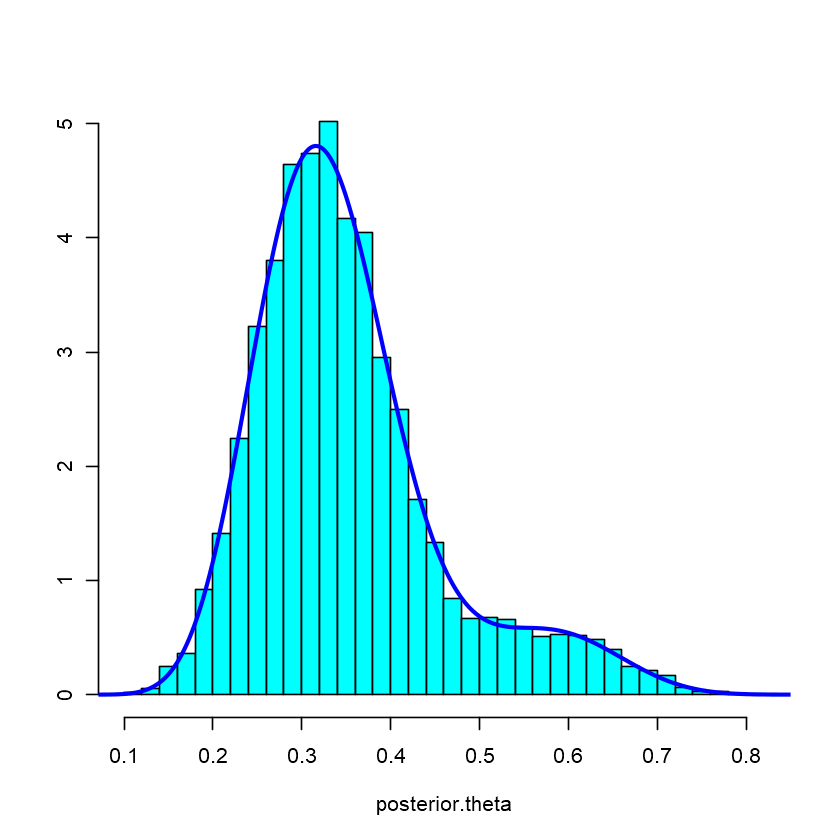

In [11]:
require(MASS) # for truehist
N<-10000
Ind<-rbinom(N,size=1,prob=posterior.gamma)
posterior.theta<-Ind*rbeta(N,shape1=posterior.alpha1,shape2=posterior.beta1)+(1-Ind)*rbeta(N,shape1=posterior.alpha2,shape2=posterior.beta2)
truehist(posterior.theta)
lines(u,mixture.posterior.pdf(u),lwd=2.5,col="blue",xlab="",ylab="",main="Mixture posterior")

#### Credible interval with a given probability

The easiest way to obtain an interval $[a,b]$ of $\theta$ values such that its posterior probability is a given value, e.g., $\pi=0.95$ is to use a random sample from the posterior distribution.

Taking it quantile-symmetrical, i.e., such that both tails have probability $(1-\pi)/2=0.025$, the interval is:

In [13]:
#! we are computing this interval from the simulated values
p<-0.95
q<-(1-p)/2
round(quantile(posterior.theta,p=c(q,p+q)),4)
#  2.5%  97.5% 
#0.1932 0.6400

2.5%  97.5% 
0.1938 0.6359

Posterior 95% credible interval: $(0.1932,0.6400)$.

### Exercise: a biased coin

##### From  Jim Albert (2009), _Bayesian computation with R (2nd ed),_ Springer, pp. 49-52.

Suppose a special coin is known to have a significant bias, but we don’t know if the coin is biased toward heads or tails. If $p$ represents the probability that the coin lands heads, we believe that either $p$ is in the neighborhood of $0.3$ or in the neighborhood of $0.7$ and it is equally likely that $p$ is in one of the two neighborhoods. This belief can be modeled using the prior density:

$$
    g(p) = \gamma\,g_1(p) + (1 − \gamma)\,g_2(p),
$$

where $g_1$ is $\operatorname{Beta}(6, 14)$, $g_2$ is $\operatorname{Beta}(14, 6)$, and the mixing probability is $\gamma=0.5$.

Suppose we flip the coin ten times and obtain seven heads and three tails. 

In close parallel to the above example perform a complete Bayesian analysis of this model.


In [ ]:
#
# Insert here your code
#

## A more elaborate mixture prior for the Diaconis spinning coin problem

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. Thus, a final approximation to the prior was taken as:

$$
	0.50\cdot\operatorname{Beta}(10,20) + 0.20\cdot\operatorname{Beta}(15,15) + 0.30\cdot\operatorname{Beta}(20,10).
$$

#### Exercise

In close parallel to the above examples perform a complete Bayesian analysis of this model.

In [ ]:
#
# Insert your code here
#

#### Plotting the prior pdf

In [ ]:
#
# Insert your code here
#

#### Simulating prior pdf

In [ ]:
#
# Insert your code here
#


#### Prior predictive pdf from a mixture prior
	
The prior pdf for $\theta$ is:

$$
	h(\theta)=\gamma_{1}\cdot h_{1}(\theta)+\gamma_{2}\cdot h_{2}(\theta)+\gamma_{3}\cdot h_{3}(\theta),
$$

and the likelihood is: $f(x\,|\,\theta)$. We assume the $h_{i}(\theta),quad i=1,2,3,$ belong to the conjugate family to the likelihood. 

Then, the joint pdf is:

$$
	f(x,\theta)=\sum_{i=1}^{3}\gamma_{i}\cdot f_{i}(x,\theta).
$$

where:

$$
	 f_{i}(x,\theta)=f(x\,|\,\theta)\cdot h_{i}(\theta),\quad i=1,2,3.
$$
   
Integrating out $\theta$, the marginal for $x$ is:

$$
	f(x)=\sum_{i=1}^{3}\gamma_{i}\cdot f_{i}(x),
$$	

where:

$$
	f_{i}(x)=\int f(x\,|\,\theta)\cdot h_{i}(\theta)\,d\theta, \quad i=1,2,3.
$$

Thus, the prior predictive pdf is a mixture, a convex combination of the three _partial prior predictive pdf's,_ with the same coefficients as the prior. By virtue of the conjugacy property these partial prior predictive pdf's follow from the general formulas of the conjugate pair, so there is no need to explicitly integrate $\theta$ out. 

In [ ]:
#
# Insert your code here
#

#### Plot prior predictive pdf and check consistency with observed data

In [ ]:
#
# Insert your code here
#

#### Posterior pdf from a mixture prior

From Bayes' formula:

$$
	h(\theta\,|\,x)=\dfrac{f(x,\theta)}{f(x)}
		=\dfrac{1}{f(x)}\cdot \sum_{i=1}^{3}\gamma_{i}\cdot f_{i}(x,\theta),
$$	

where $x$ is the actually observed data. We will use the obvious notation:

$$
	h_{i}(\theta\,|\,x)=\dfrac{f_{i}(x,\theta)}{f_{i}(x)}	\quad i=1,2,3.
$$

These functions are called _partial posterior pdf's._ Again, the conjugacy property allows us to derive them from the general formulas of the conjugate pair, that is, they belong to the same family as the priors with updated parameters.
The posterior pdf is:

$$
	h(\theta\,|\,x)=\sum_{i=1}^{3}\widehat{\gamma_{i}}(x)\cdot h_{i}(\theta\,|\,x),
$$

where the _posterior mixture weights_ are:

$$
	\widehat{\gamma_{i}}(x)=\dfrac{\gamma_{i}\cdot f_{i}(x)}{f(x)}, \quad i=1,2,3.
$$

In [ ]:
#
# Insert your code here
#

#### Plotting the mixture posterior

In [ ]:
#
# Insert your code here
#

#### MAP estimator of $\theta$

This posterior pdf has a unique mode, to be determined numerically

In [ ]:
#
# Insert your code here
#

In Diaconis and Ylvisaker (1985) they compare these two mixture conjugate priors with a $\operatorname{Unif}(0,1)$ prior with the data above. Comparing the MAP estimators, they observe that in a first approximation, they coincide, but spreads do depend on the prior.

They repeat the computations above with a larger sample. 

Their conclusion is that with small data, prior matters, but with larger samples, a finely tuned choice of prior is less important.

In [ ]:
n1<-50
x1<-14